<a href="https://colab.research.google.com/github/WeiKuoLi/Picture-Interpolation/blob/main/picture_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Info on how to get your api key (kaggle.json) here: https://github.com/Kaggle/kaggle-api#api-credentials
!pip install kaggle
api_token = {"username":"weikuoli","key":"0dd45cbbc01101403aade32d579c27e0"}
import json
import zipfile
import os
!cp kaggle.json ~/.kaggle
chmod 600 ~/.kaggle/kaggle.json

In [5]:
os.listdir('./.kaggle')

['kaggle.json']

In [6]:
!kaggle datasets download -d joaopauloschuler/cifar100-128x128-resized-via-cai-super-resolution

for file in os.listdir():
    zip_ref = zipfile.ZipFile('cifar100-128x128-resized-via-cai-super-resolution.zip', 'r')
    zip_ref.extractall()
    zip_ref.close() 
#ANOTHER SET THAT INTERESTS ME Chaladze G., Kalatozishvili L. 2017. Linnaeus 5 Dataset for Machine Learning 

100% 3.45G/3.45G [03:49<00:00, 22.5MB/s]
100% 3.45G/3.45G [03:49<00:00, 16.1MB/s]


KeyboardInterrupt: ignored

In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import cv2
from google.colab.patches import cv2_imshow  ##only use when in google colab
from os import listdir
import re
import gc   
import random

In [8]:
# import libraries
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow import keras

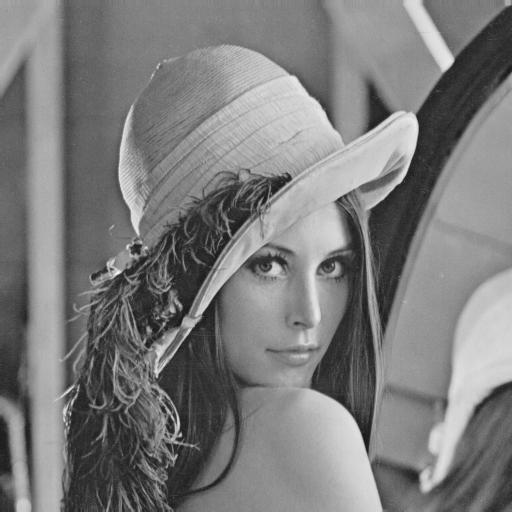

In [10]:
img = cv2.imread('lena.bmp')
cv2_imshow(img)

In [11]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
a[:2][:]

array([[1, 2, 3],
       [4, 5, 6]])

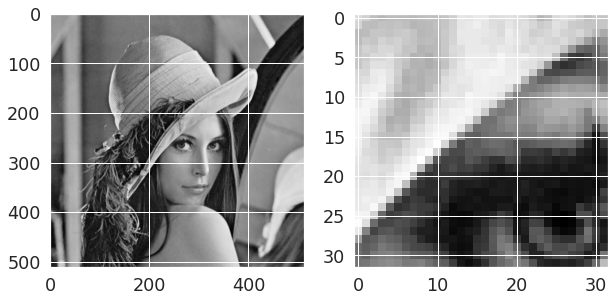

In [12]:
simg = tf.reduce_mean(img,axis=2)
def cut_pic(s,size,x,y):
  w = np.split(s,[x,x+size])[1]
  return np.split(w,[y,y+size],axis=1)[1]

def cut_9pic(s,size):   #returns 3d array size=32
  #w=np.zeros((size,size,9))
  #for i in range(size*3):
  #  for j in range(size*3):
  #    w[i%size][j%size][int(i/size)*3+int(j/size)]=s[i+x][j+y]
  t=s.reshape(32,3,32,3, order='F')  #F=forward  first axis runs fastest
  t=np.swapaxes(t,1,2)
  w = t.reshape(32,32,9)
  return w

mimg = cut_pic(np.array(simg),32,239,239)
#m = cut_pic(np.array(s),96,207,207)
fig, ax=plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(simg,cmap=plt.cm.gray)
ax[1].imshow(mimg,cmap=plt.cm.gray)
plt.show()



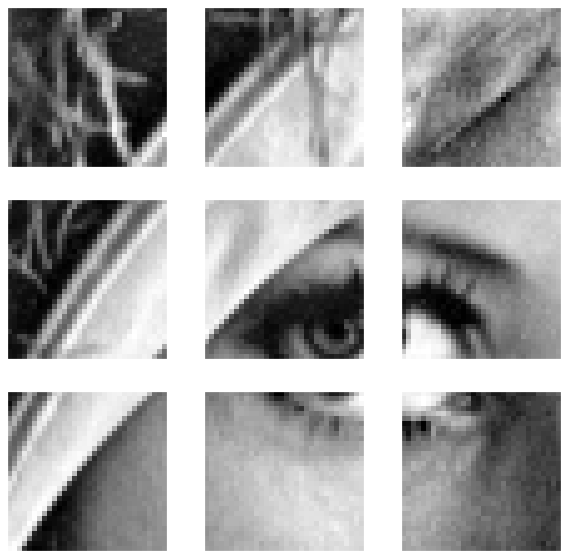

In [13]:
m9_img = cut_9pic(cut_pic(np.array(simg),96,207,207),32)

def plot9(m9):   #eats a 3d array
  fig, ax=plt.subplots(3,3,figsize=(10,10))  
  tmp9=np.swapaxes(m9,0,2)
  tmp9=np.swapaxes(tmp9,1,2)
  for i in range(3):
    for j in range(3):
      ax[i][j].imshow(tmp9[3*i+j],cmap=plt.cm.gray)
 
  plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
  plt.show()
  return
plot9(m9_img)  

In [ ]:
#plt.imshow(tmp9[4],cmap=plt.cm.gray)

(128, 128, 3)


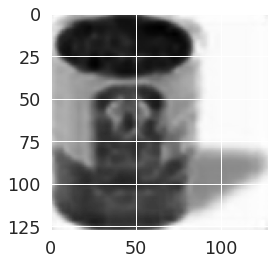

In [14]:
path='./cifar100-128/train/'
all=os.listdir(path)
xall=random.sample(all, 1)[0]

fig=os.listdir(path+xall)
xfig=random.sample(fig, 1)[0]
p=cv2.imread(path+xall+'/'+xfig)
print(np.array(p).shape)


p=tf.reduce_mean(p,axis=2)
'''
p2=p.numpy()
p3=cv2.resize(np.array(p2),dsize=(512,512))
'''

plt.imshow(p,cmap=plt.cm.gray)

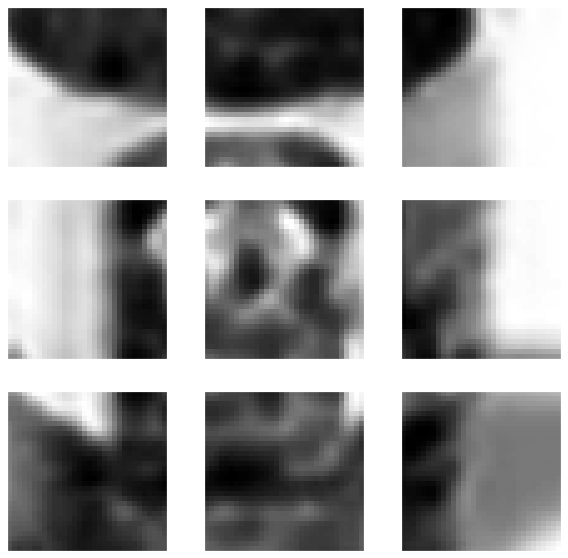

In [15]:
def get_r_9pic(pic,lim,size): #p_3d (32,32,9)
  size3=3*size 
  x = random.randint(0, lim-size3)
  y = random.randint(0, lim-size3)
  p_3d=cut_9pic(cut_pic(pic,size*3,x,y),size)
  return p_3d
p_3d=get_r_9pic(p,128,32)
plot9(p_3d)
#ids = random.sample(list(train_df['StudyInstanceUID'].values), n_ids)

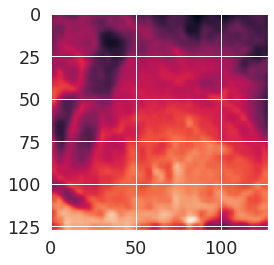

In [16]:
path='./cifar100-128/train/'
all=os.listdir(path)
n_image=400
all_pic=[]
for i in range(10):
  xall=random.sample(all, 10)[i]
  fig=os.listdir(path+xall)
  xfig=random.sample(fig, n_image)
  for j in range(n_image):
    all_pic.append(cv2.imread(path+xall+'/'+xfig[j]))



all_pic=tf.reduce_mean(all_pic,axis=3)
plt.imshow(all_pic[3])

In [68]:
all_pic.shape


TensorShape([4000, 128, 128])

In [18]:
all_pic_3d=[]
target=[]
for pic in all_pic:
  
  pic_3d=get_r_9pic(np.array(pic),128,32)

  s = np.std(pic_3d)
  m = np.mean(pic_3d)
  pic_3d = (pic_3d - m) /s 
#the m and s are wrong
  all_pic_3d.append(np.delete(pic_3d,4,2))
  pic_3d=np.swapaxes(pic_3d,0,2)
  pic_3d=np.swapaxes(pic_3d,1,2)
  target.append(pic_3d[4])

print(np.array(all_pic_3d).shape, np.array(target).shape)


(4000, 32, 32, 8) (4000, 32, 32)


In [19]:
print(np.array(all_pic_3d).shape, np.array(target).shape)

(4000, 32, 32, 8) (4000, 32, 32)


**2D CNN MODEL**

In [20]:
# import libraries
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
from tensorflow import keras

In [ ]:
#gpu related
#os.environ['TFF_CPP_MIN_LOG_LEVEL']='2'
#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True) 

In [21]:

train_X = (tf.convert_to_tensor(all_pic_3d,dtype=tf.float32))

train_Y = (tf.convert_to_tensor(target,dtype=tf.float32))

In [22]:
def get_model():
    
    img_input = layers.Input(shape=(32,32,8))
   
    # First convolution extracts 16 filters that are 3x3
    # Convolution is followed by max-pooling layer with a 2x2 window
    x = layers.Resizing(48, 48, interpolation="bilinear", crop_to_aspect_ratio=False)(img_input)
    #x = layers.Conv2D(36, 3, activation='relu')(x)
   # x = layers.MaxPooling3D(2)(x)
   
    xt = layers.Conv2D(16, 3, activation='relu')(x)
    
    x2 = layers.Conv2D(12, 3, activation='relu')(xt)
    #x2 = layers.MaxPooling2D(2)(x2)
    
    #x3 = layers.Conv2D(8, 3, activation='relu')(x2)
    x3 = layers.Resizing(32, 32, interpolation="bilinear", crop_to_aspect_ratio=False)(x2)
    #x4 = layers.Reshape((32,32))(x3) 
 
     
    x4 = layers.Dense(4, activation='tanh')(x3)
    output = layers.Dense(1, activation='tanh')(x4)

    # Create model:
    model = Model(img_input, output)
    
    return model
tf.keras.backend.clear_session()

In [23]:
def model_getfit(A,B):
    tf.keras.backend.clear_session()
    model = get_model()
    model.summary()
    model.compile( loss=tf.keras.losses.MeanSquaredError() , #competition_loss, 
              optimizer=RMSprop(learning_rate=0.005),
              metrics=[tf.keras.metrics.MeanSquaredError()])


    history = model.fit(A,B, validation_split=0.2, epochs =103) #delete
    return model, history

In [24]:
model, history = model_getfit(train_X,train_Y)
'''
print("loss for validation data = ")
val_prediction=model.predict(val_X)
val_loss = tf.reduce_mean(tf.keras.metrics.MeanSquaredError(val3D_Y,val3D_prediction),keepdims=False)
print(val_3D_loss)
'''


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 8)]       0         
                                                                 
 resizing (Resizing)         (None, 48, 48, 8)         0         
                                                                 
 conv2d (Conv2D)             (None, 46, 46, 16)        1168      
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 12)        1740      
                                                                 
 resizing_1 (Resizing)       (None, 32, 32, 12)        0         
                                                                 
 dense (Dense)               (None, 32, 32, 4)         52        
                                                                 
 dense_1 (Dense)             (None, 32, 32, 1)         5     

'\nprint("loss for validation data = ")\nval_prediction=model.predict(val_X)\nval_loss = tf.reduce_mean(tf.keras.metrics.MeanSquaredError(val3D_Y,val3D_prediction),keepdims=False)\nprint(val_3D_loss)\n'

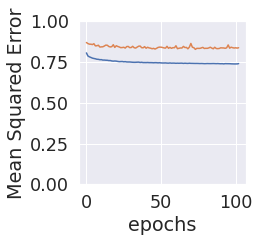

In [25]:
#Define figure and axes
fig, ax = plt.subplots(1,1, figsize=(3,3))
ax.set_ylim(ymin=0., ymax=1)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")

# add the image 
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
#plt.scatter(len(history_3D.history['val_loss']),val_3D_loss)
#plt.scatter(10,history_3D.history['loss'][0])
# Add the boxe
#res=[]
#res.append([300,history_3D.history['loss'],(history_3D.history['val_loss'])])
# diplay
plt.show()

125/125 [==============================] - 0s 2ms/step


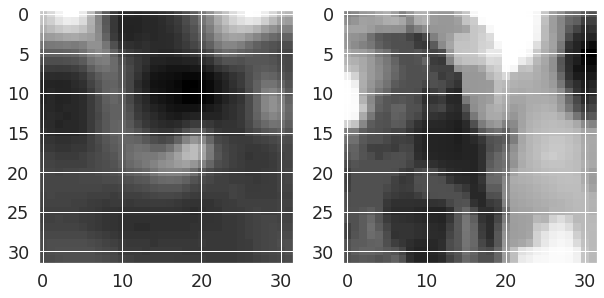

In [35]:
y_pred=model.predict(train_X)
fig, ax=plt.subplots(1,2,figsize=(10,10))
iim =  random.randint(0, 2000)
ax[0].imshow(train_Y[iim],cmap=plt.cm.gray)
y_predi=y_pred[iim] 
y_predi=y_predi.reshape(32,32)
ax[1].imshow(y_predi,cmap=plt.cm.gray)
plt.show()

In [36]:
m9_img = cut_9pic(cut_pic(np.array(simg),96,207,207),32)
print(m9_img.shape)

(32, 32, 9)


(32, 32, 9)
(1, 32, 32, 8)
1/1 [==============================] - 0s 17ms/step


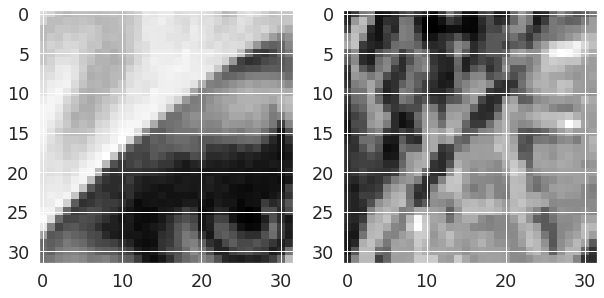

(9, 32, 32)


In [66]:
m9_img = cut_9pic(cut_pic(np.array(simg),96,207,207),32)
print(m9_img.shape)
m9_3d=[]
m9_t=[] 

s = np.std(m9_img)
m = np.mean(m9_img)
m9_img = (m9_img - m) /s  
m9_3d=[(np.delete(m9_img,4,2)) ]

print(np.array(m9_3d).shape)
m9_img=np.swapaxes(m9_img,0,2)
m9_img=np.swapaxes(m9_img,1,2)
m9_t.append(m9_img[4])
#m9_3d=np.swapaxes(m9_3d,0,2)
#m9_3d=np.swapaxes(m9_3d,1,2)
m9_pred=model.predict((tf.convert_to_tensor(m9_3d,dtype=tf.float32)))
fig, ax=plt.subplots(1,2,figsize=(10,10))
 
ax[0].imshow(m9_t[0],cmap=plt.cm.gray)
m9_predi=m9_pred[0] 
m9_predi=m9_predi.reshape(32,32)
#m9_predi = m9_predi*s+m
ax[1].imshow(m9_predi,cmap=plt.cm.gray)
plt.show()
print(np.array(m9_img).shape)
 

(32, 32)
now (9, 32, 32)
(9, 32, 32)


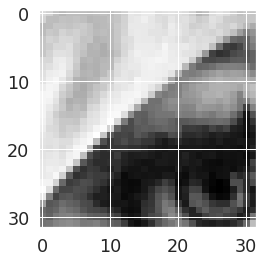

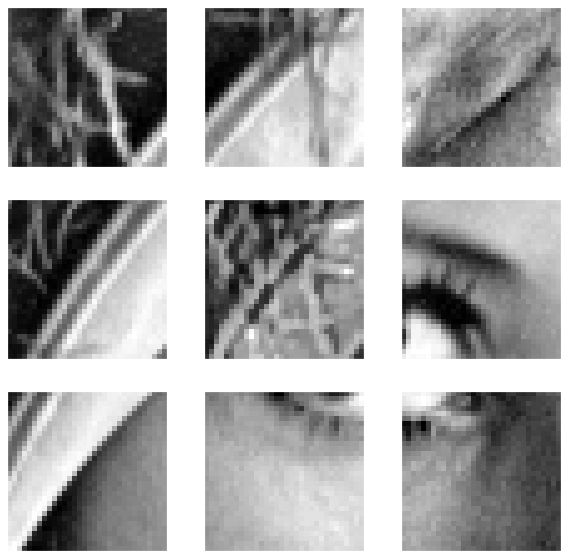

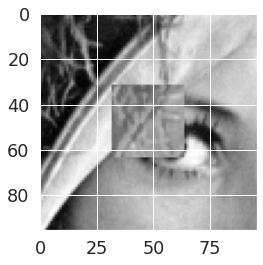

In [67]:
print(np.array(m9_predi).shape)
print('now',np.array(m9_img).shape)
#m9_img=np.swapaxes(m9_img,0,2)
#m9_img=np.swapaxes(m9_img,2,1)
print(np.array(m9_img).shape)
plt.imshow(m9_img[4],cmap=plt.cm.gray)
m9_img[4]=m9_predi 
m9_img2=np.swapaxes(m9_img,2,1)
m9_img2=np.swapaxes(m9_img2,0,2)

plot9(m9_img2)

w = m9_img2.reshape(32,32,3,3)
w=np.swapaxes(w,1,2)
w=w.reshape(96,96, order='F')  #F=forward  first axis runs fastest
plt.imshow(w,cmap=plt.cm.gray)